In [1]:
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

In [2]:
def nonlinear(x):
    return 20*np.log10(x)

def cpu2gpu(cpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 25/700
    return conversion_factor * cpu_hour

def gpu2cpu(gpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 700/25
    return conversion_factor * gpu_hour

In [3]:
labels = [
    'DeepClean',
    'Match filt.',
    'Param. Est.\n(sampling)',
    'Follow-up',
]
x = np.array([3600, 3600, 1, 1/(24*30),]) # events/hr
y = np.array([gpu2cpu(1), 3000, 100, 10]) # Core-hours
w = np.array([30*3600, 30*3600, 30*10, 100]) # num triggers in 30 day

In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

In [5]:
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#17becf', '#7f7f7f', '#bcbd22', '#d62728']

In [6]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.set_style("CMS")
# hep.set_style({"font.sans-serif":'Comic Sans MS'})

/tmp/ipykernel_32706/1848330035.py:2: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


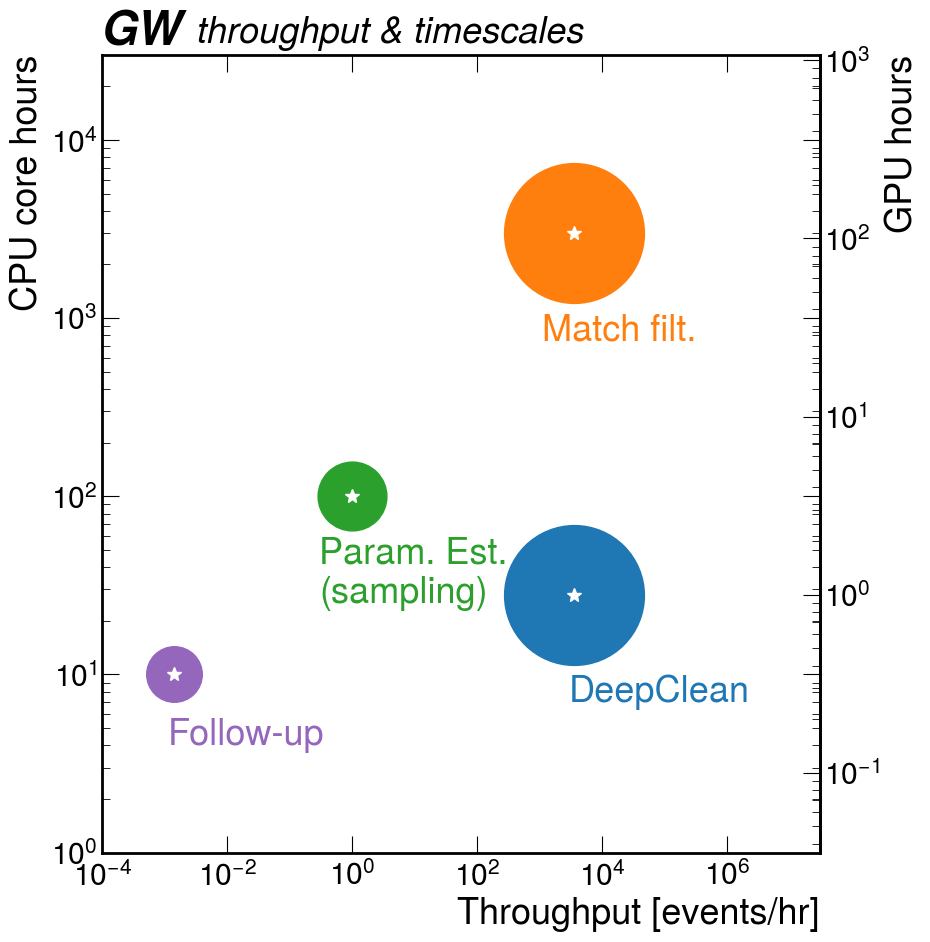

In [7]:
f, ax = plt.subplots()
for xi, yi, wi, l, c in zip(x, y, w, labels, colors):
    ax.plot([xi], [yi], label=l, marker='o', markersize=nonlinear(wi), color=c)
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    if 'Match' in l:
        ax.text(xi*0.3, yi*0.25, l, color=c)
    elif 'DeepClean' in l:
        ax.text(xi*0.8, yi*0.25, l, color=c)
    elif 'sampling' in l:
        ax.text(xi*0.3, yi*0.25, l, color=c)
    else:
        ax.text(xi*0.8, yi*0.4, l, color=c)

# plt.legend()
# ax.plot([300*1e-2], [1e18], label='1 TB/yr', marker='o', markersize=nonlinear(1e12), color='gray')
# ax.plot([40*2e0], [1e18], label='1 PB/yr', marker='o', markersize=nonlinear(1e15), color='gray')
# ax.plot([10*1e3], [1e18], label='1 EB/yr', marker='o', markersize=nonlinear(1e18), color='gray')
# ax.text(300*0.23e-2, 0.3e19, '1 TB/yr', color='black',size=18)
# ax.text(40*0.40e0, 0.7e19, '1 PB/yr', color='black',size=18)
# ax.text(10*0.23e3, 0.7e18, '1 EB/yr', color='white',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="GW",italic=(True, True),loc=0,pad=0)

ymin = 1
ymax = 30000
xmin = 1e-4
xmax = 3e7

# FPGA/ASIC contour
# ax.text(1e-7, 1e19, 'FPGA/ASIC', color='gray',size=18)
# box_y = np.array([ymin, ymin, ymax, ymax])
# box_x = np.array([xmin, 2e-3, 2e-3, xmin])
# ax.fill(box_x, box_y, 'r', alpha=0.1)

# GPU/CPU contour
# ax.text(0.3, 4e15, 'CPU/GPU', color='gray',size=18)
# box_y = np.array([ymin, ymin, 1e16, 1e16])
# box_x = np.array([1e-4, xmax, xmax, 1e-4])
# ax.fill(box_x, box_y, 'b', alpha=0.1)

secax = ax.secondary_yaxis('right', functions=(cpu2gpu, gpu2cpu))

ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('CPU core hours')
secax.set_ylabel('GPU hours')
#hep.cms.label(loc=0)

plt.tight_layout()
plt.savefig('gw-plot-v0.pdf')